# Data Dive 4
## Real Estate Agency

### 

In [3]:
# Modules

#!pip install missingno
#Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido

ERROR: Could not find a version that satisfies the requirement plotly-orca (from versions: none)
ERROR: No matching distribution found for plotly-orca
     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/85.8 MB 1.1 MB/s eta 0:00:59m^C
     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/85.8 MB 1.1 MB/s eta 0:00:59
ERROR: Operation cancelled by user


In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn import linear_model

import plotly.express as px
import plotly.io as pio

#import missingno as msno


In [3]:
# Read data
house_df = (pd.read_csv('housing.csv', header = 0))

In [9]:
# Basic Info

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

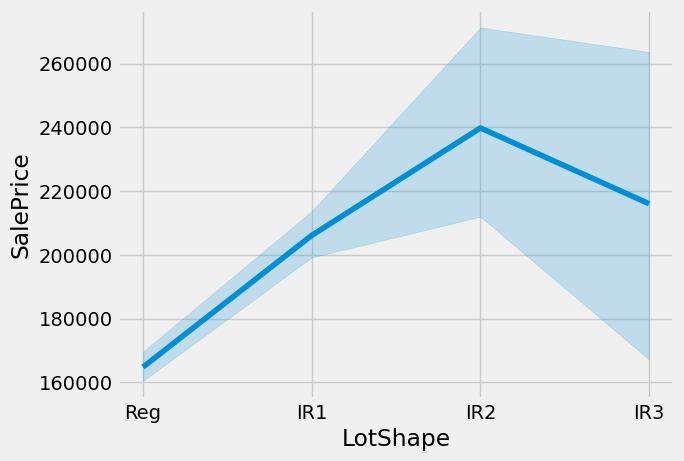

In [26]:
## Looking at the irregularity of lot shape
sns.lineplot(data=house_df,x='LotShape',y='SalePrice')

ir1_df = house_df[house_df['LotShape']=='IR1']

<Axes: xlabel='LotShape', ylabel='SalePrice'>

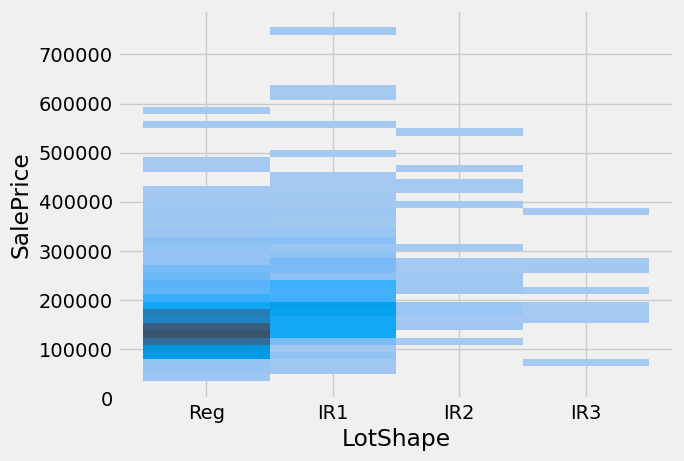

In [25]:
# Another option of looking at shape
sns.histplot(data=house_df,x='LotShape',y='SalePrice')

In [34]:
house_df['SalePrice'].groupby(house_df['LotShape']).agg(['median','mean'])
#house_df['GrLivArea'].groupby(house_df['LotShape']).agg(['median','mean'])

nei_df = house_df['SalePrice'].groupby(house_df['Neighborhood']).agg(['median'])
nei_df = nei_df.sort_values(ascending=True,by='median')


<Axes: xlabel='LandSlope', ylabel='SalePrice'>

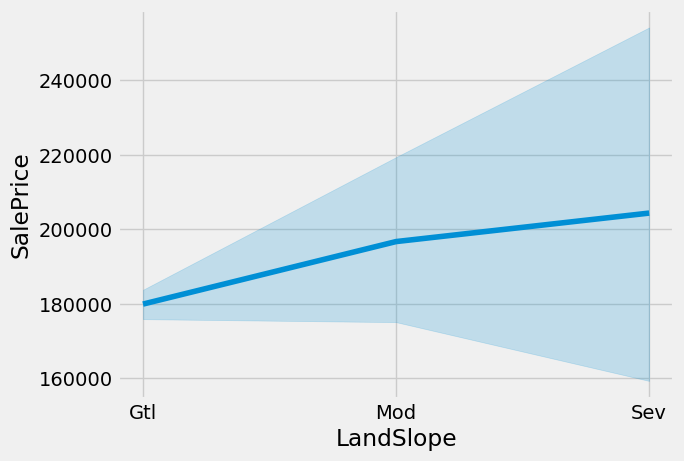

In [22]:
sns.lineplot(data=house_df,x='LandSlope',y='SalePrice')


<Axes: xlabel='LandSlope', ylabel='SalePrice'>

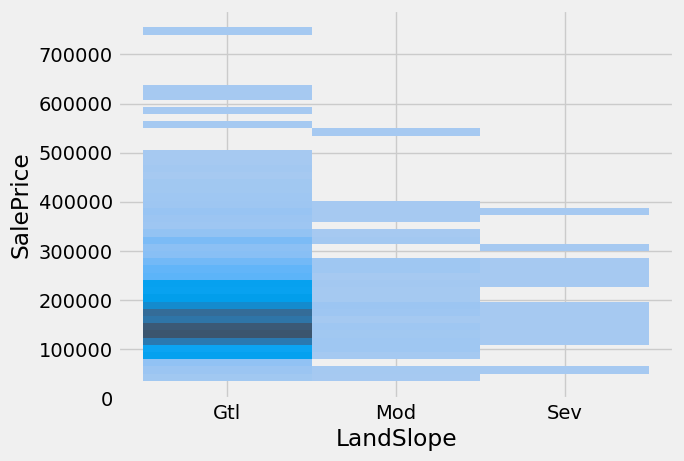

In [36]:
sns.histplot(data=house_df,x='LandSlope',y='SalePrice')

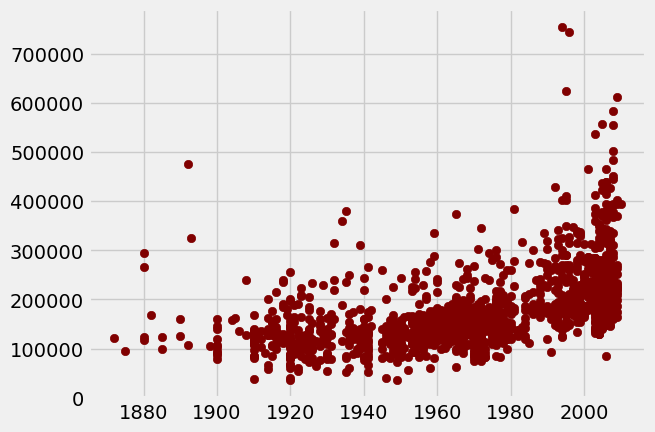

In [64]:
plt.scatter(data["YearBuilt"],data['SalePrice'],color='maroon')

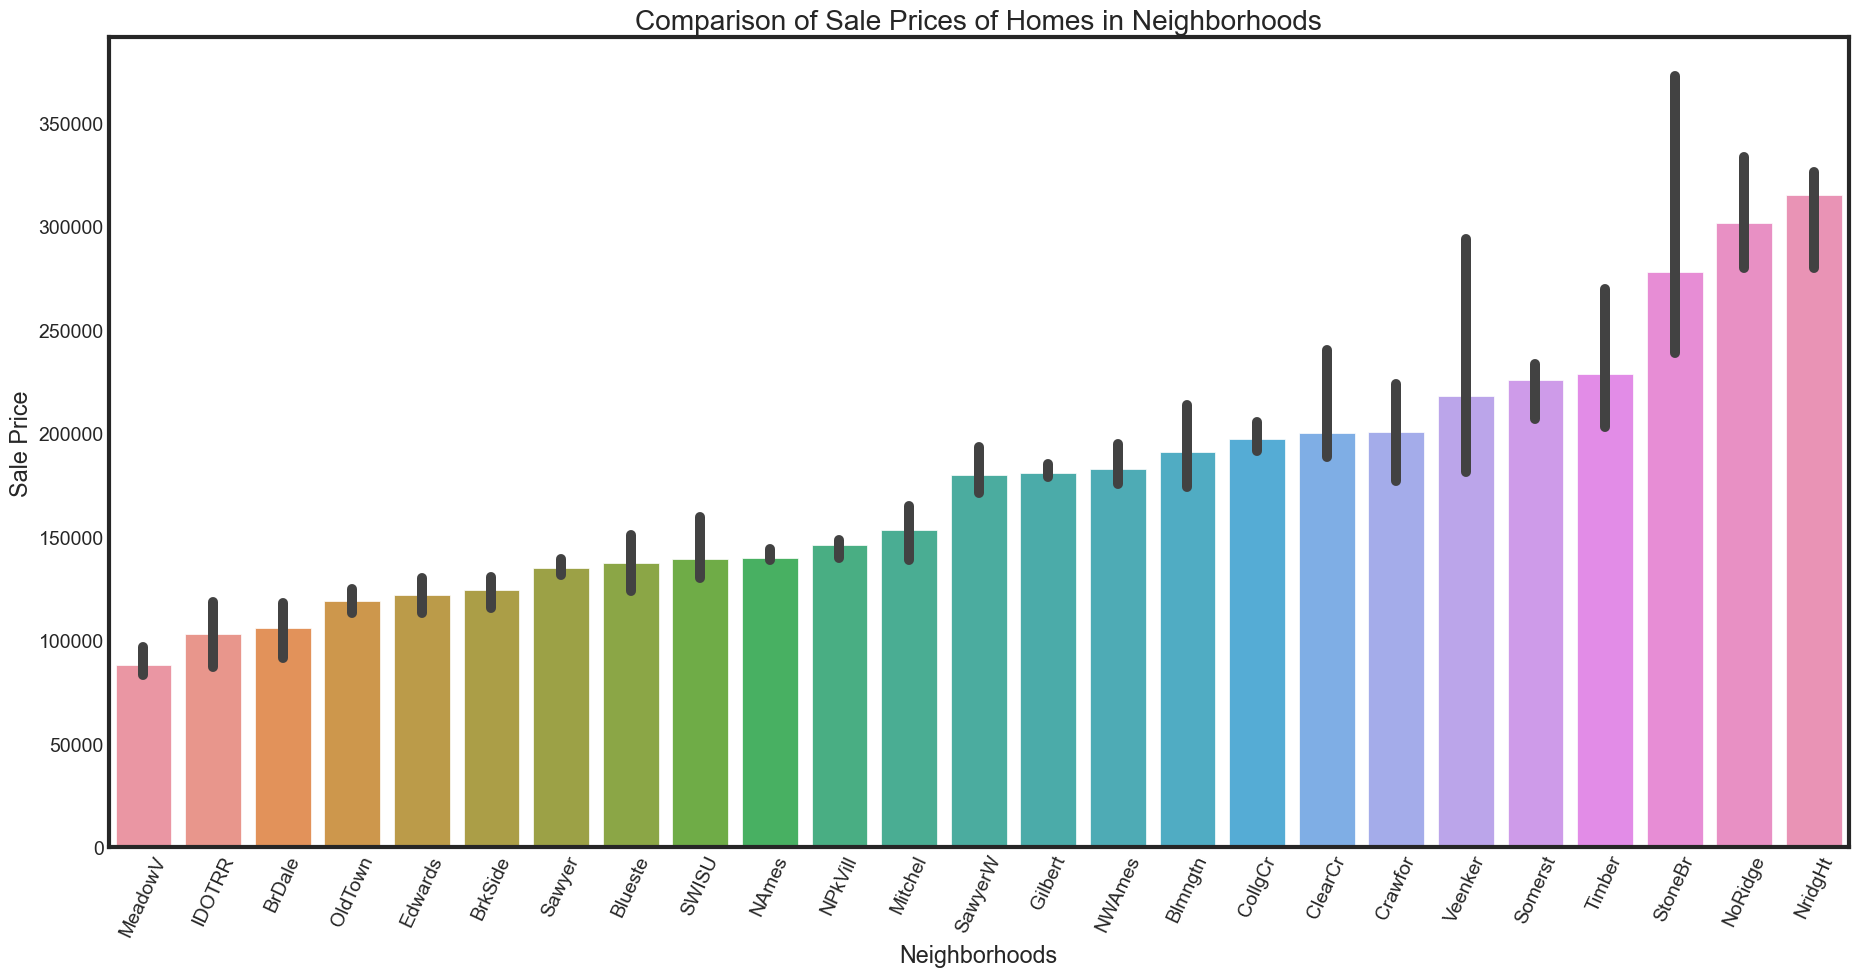

In [128]:
#Sale Prices of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=house_df,x='Neighborhood',y='SalePrice',order=nei_df.index,estimator=np.median)
#fig = sns.boxplot(data=house_df,x='Neighborhood',y='SalePrice',order=nei_df.index)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Comparison of Sale Prices of Homes in Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Sale Price');


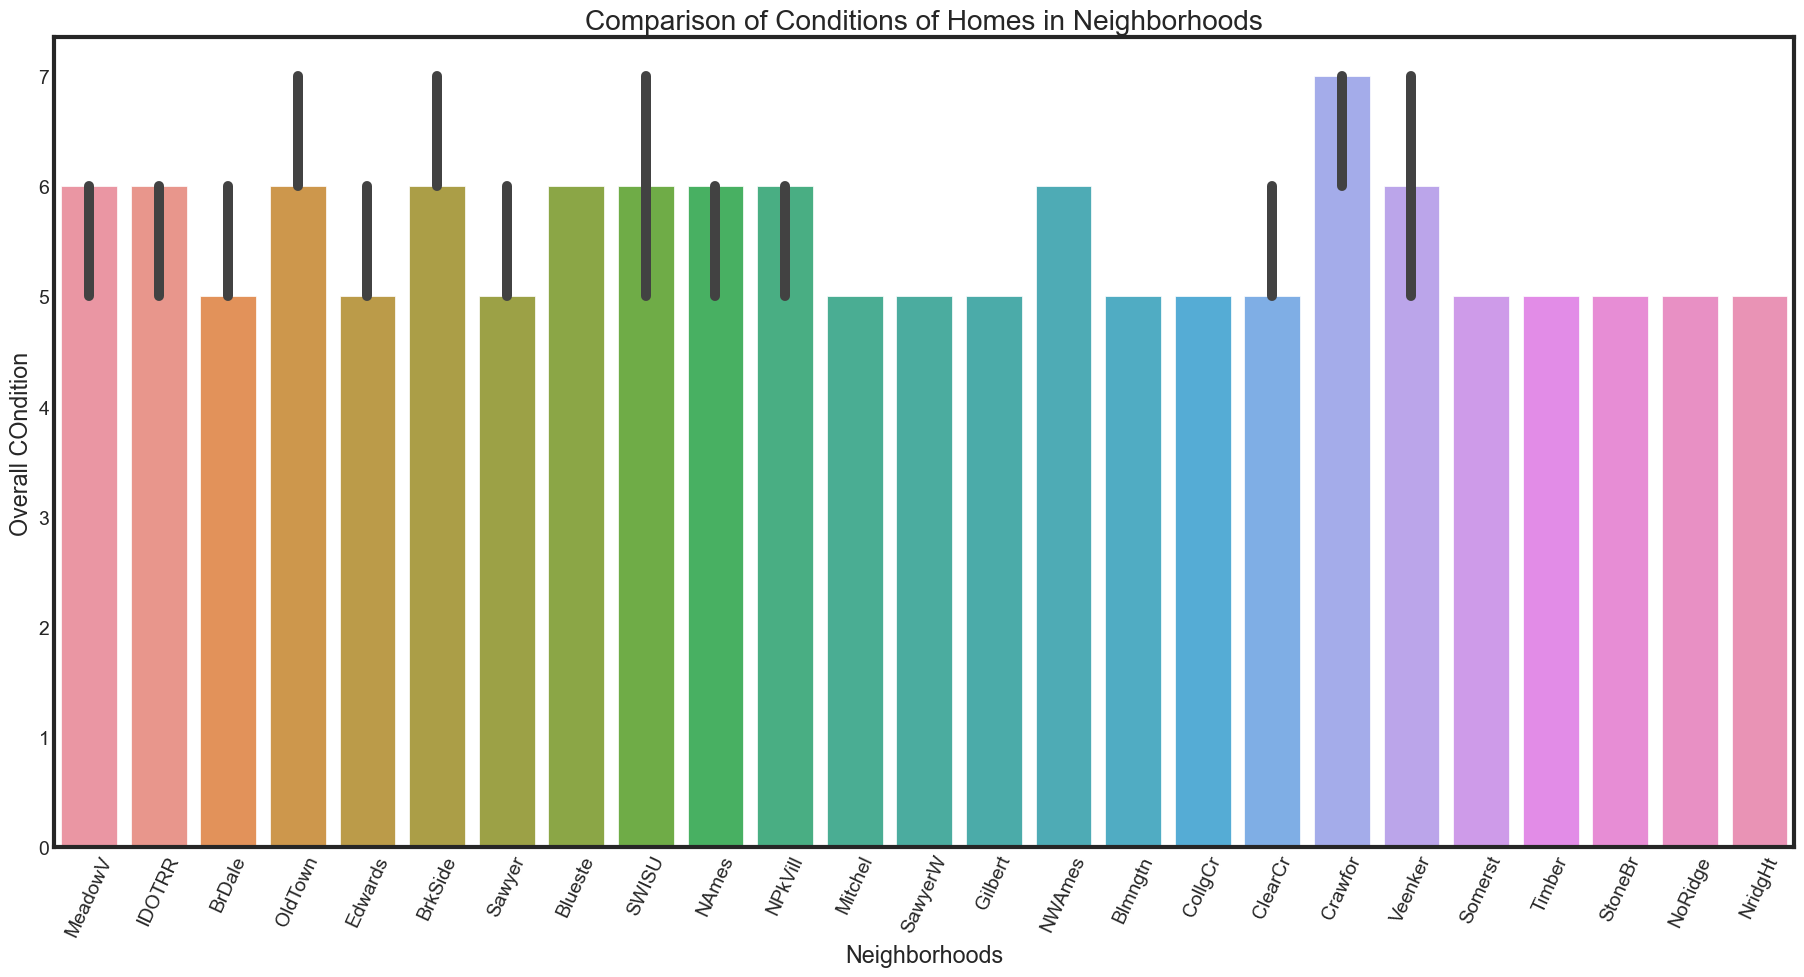

In [129]:
#Overall Conditions for sales by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=house_df,x='Neighborhood',y='OverallCond',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Comparison of Conditions of Homes in Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Overall COndition');

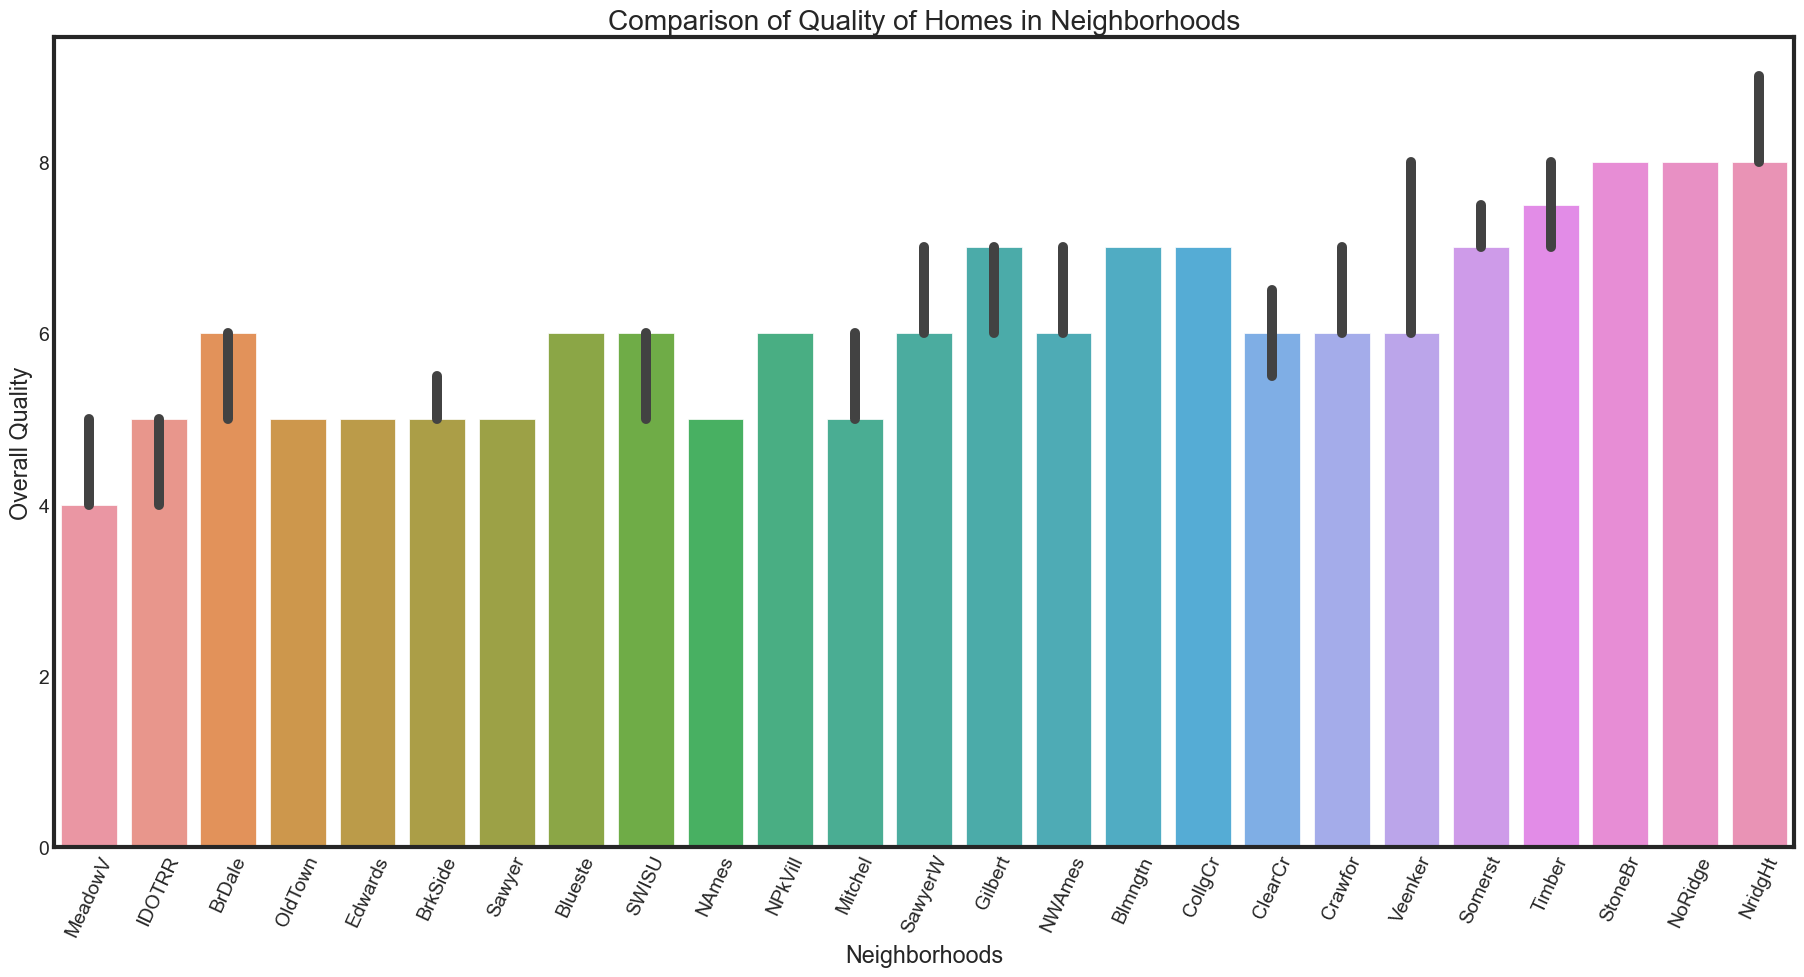

In [130]:
#Overall Quality of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=house_df,x='Neighborhood',y='OverallQual',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Comparison of Quality of Homes in Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Overall Quality');

In [77]:
#Creating a dataset of neighborhoods with median cheap sales 
cheap_df = house_df[house_df['Neighborhood'].isin(nei_df.index[0:8])]
cheap_df.info()
print(nei_df.index[0:10])
cheap_df['LotArea'].median()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 8 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             417 non-null    int64  
 1   MSSubClass     417 non-null    int64  
 2   MSZoning       417 non-null    object 
 3   LotFrontage    367 non-null    float64
 4   LotArea        417 non-null    int64  
 5   Street         417 non-null    object 
 6   Alley          61 non-null     object 
 7   LotShape       417 non-null    object 
 8   LandContour    417 non-null    object 
 9   Utilities      417 non-null    object 
 10  LotConfig      417 non-null    object 
 11  LandSlope      417 non-null    object 
 12  Neighborhood   417 non-null    object 
 13  Condition1     417 non-null    object 
 14  Condition2     417 non-null    object 
 15  BldgType       417 non-null    object 
 16  HouseStyle     417 non-null    object 
 17  OverallQual    417 non-null    int64  
 18  OverallCo

8250.0

In [81]:
#Creating dataset with neighborhoods with expensive sales
exp_df = house_df[house_df['Neighborhood'].isin(nei_df.index[17:])]
exp_df.info()
print(nei_df.index[17:])
exp_df['LotArea'].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 1457
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             357 non-null    int64  
 1   MSSubClass     357 non-null    int64  
 2   MSZoning       357 non-null    object 
 3   LotFrontage    298 non-null    float64
 4   LotArea        357 non-null    int64  
 5   Street         357 non-null    object 
 6   Alley          25 non-null     object 
 7   LotShape       357 non-null    object 
 8   LandContour    357 non-null    object 
 9   Utilities      357 non-null    object 
 10  LotConfig      357 non-null    object 
 11  LandSlope      357 non-null    object 
 12  Neighborhood   357 non-null    object 
 13  Condition1     357 non-null    object 
 14  Condition2     357 non-null    object 
 15  BldgType       357 non-null    object 
 16  HouseStyle     357 non-null    object 
 17  OverallQual    357 non-null    int64  
 18  OverallCo

11000.0

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

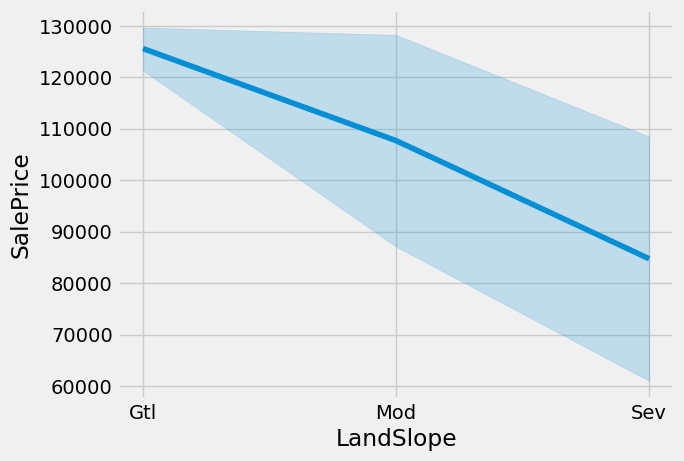

In [83]:
#Looking at land slope in cheap neighborhoods
sns.lineplot(data=cheap_df,x='LandSlope',y='SalePrice')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

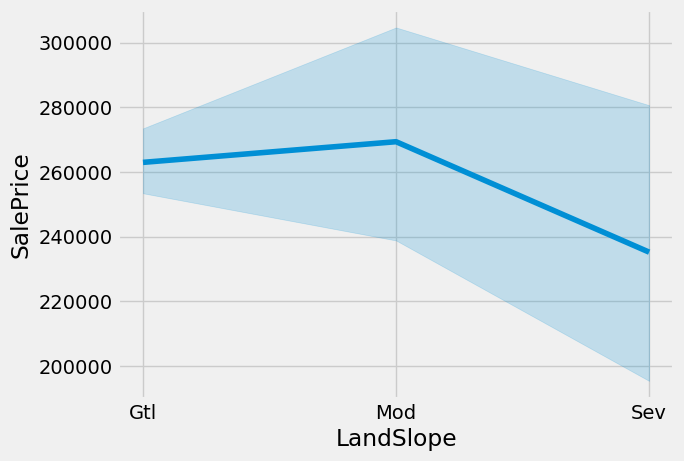

In [85]:
#Looking at land slope in expensive neighborhoods
sns.lineplot(data=exp_df,x='LandSlope',y='SalePrice')

8250.0
5.0
6.0


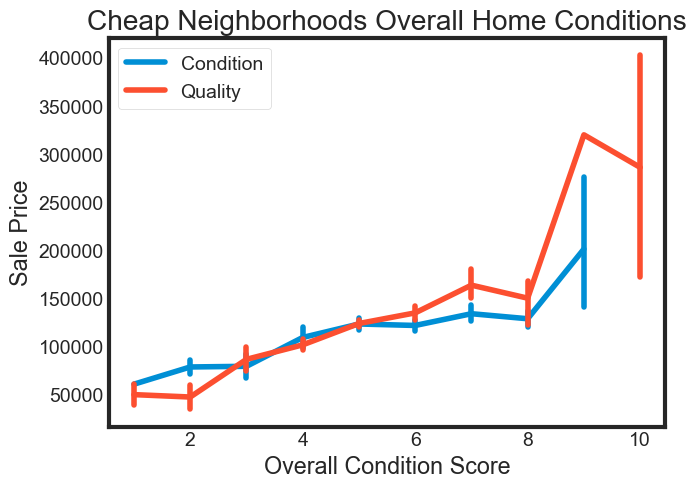

In [178]:
sns.lineplot(data=cheap_df,x='OverallCond',y='SalePrice',err_style='bars')
sns.lineplot(data=cheap_df,x='OverallQual',y='SalePrice',err_style='bars')
plt.title('Cheap Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price')
plt.legend(['Condition','Quality'],loc = 'upper left')

cheap_df['LotShape'].value_counts()
cheap_df['MSSubClass'].value_counts()
cheap_df['BldgType'].value_counts()
print(cheap_df['LotArea'].median())

#interesting
cheap_df['OverallQual'].value_counts()
print(cheap_df['OverallQual'].median())
cheap_df['OverallCond'].value_counts()
print(cheap_df['OverallCond'].median())


11000.0
7.0
5.0
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378  379          20       RL         88.0    11394   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
378         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
378      6   2010       New        Partial     394432  

[1 rows x 81 columns]


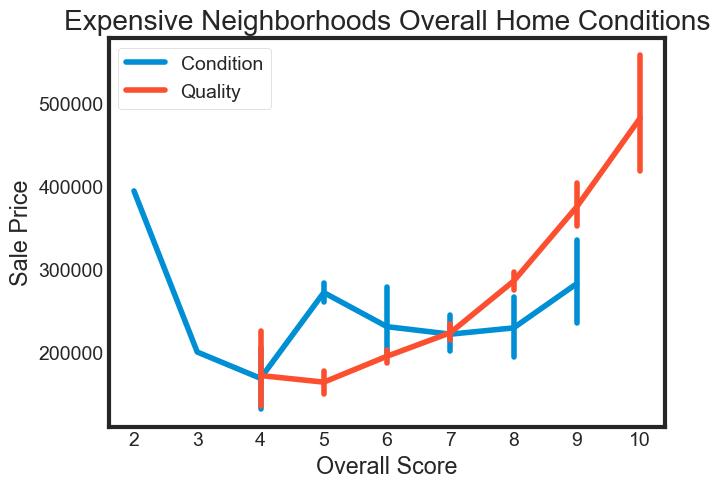

In [177]:
sns.lineplot(data=exp_df,x='OverallCond',y='SalePrice',legend='auto',err_style='bars')
sns.lineplot(data=exp_df,x='OverallQual',y='SalePrice',legend='auto',err_style='bars')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Score')
plt.ylabel('Sale Price')
plt.legend(['Condition','Quality'],loc = 'upper left')
exp_df['LotShape'].value_counts()
exp_df['MSSubClass'].value_counts()
exp_df['BldgType'].value_counts()
print(exp_df['LotArea'].median())

#interesting
exp_df['OverallQual'].value_counts()
print(exp_df['OverallQual'].median())
exp_df['OverallCond'].value_counts()
print(exp_df['OverallCond'].median())
print(exp_df[exp_df['OverallCond']==2])


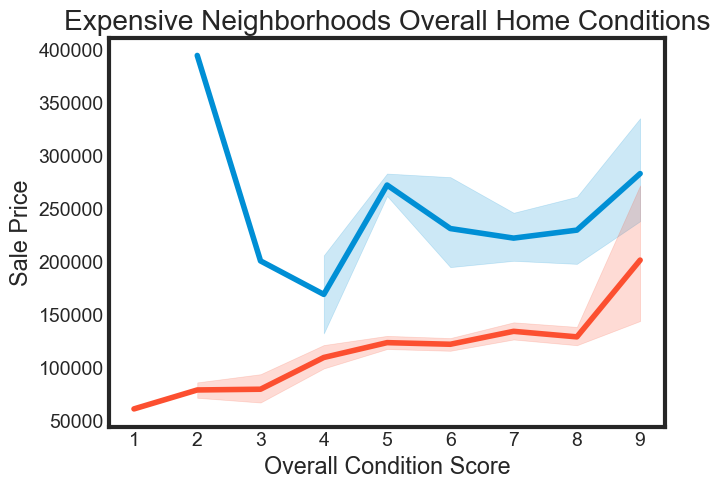

In [145]:
sns.lineplot(data=exp_df,x='OverallCond',y='SalePrice')
sns.lineplot(data=cheap_df,x='OverallCond',y='SalePrice')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price');

Text(0, 0.5, 'Sale Price')

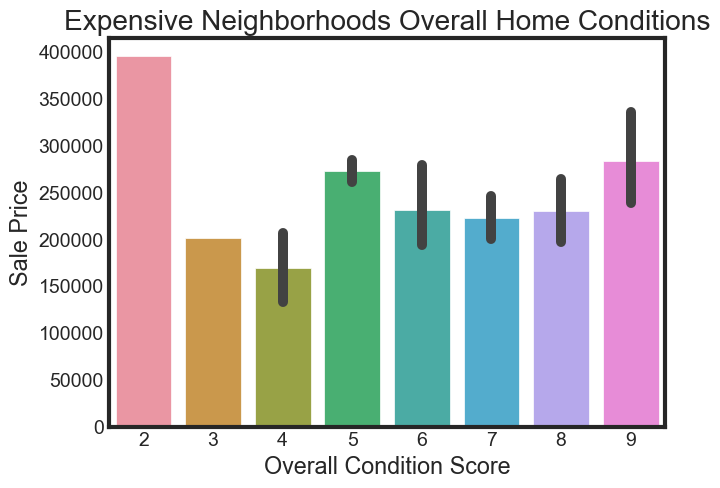

In [149]:
sns.barplot(data=exp_df,x='OverallCond',y='SalePrice')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price')


<Axes: xlabel='OverallCond', ylabel='SalePrice'>

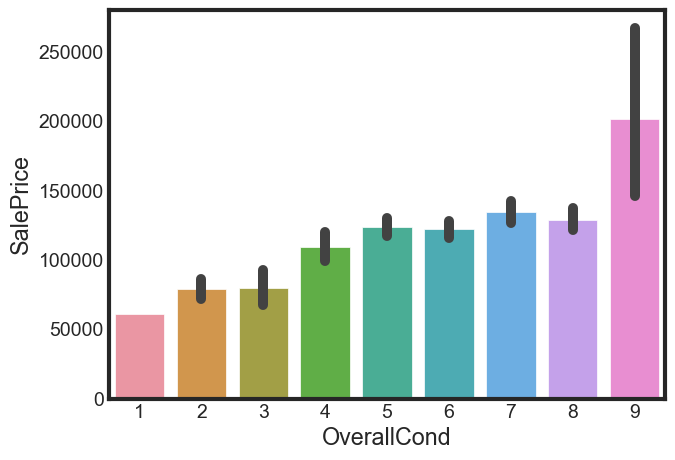

In [150]:
sns.barplot(data=cheap_df,x='OverallCond',y='SalePrice')